 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [293]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [294]:
# function that makes a df out of a path with specified parameters

def df_from_path(path, date_col = 'Date', sort = True):
    df = pd.read_csv(path, index_col=date_col, infer_datetime_format=True, parse_dates=True)
    if sort:
        df.sort_index(inplace=True)
    return df

In [295]:
# Reading whale returns
whale_path = Path('./Resources/whale_returns.csv')
whale_df = df_from_path(whale_path)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [296]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [297]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [298]:
# Reading algorithmic returns
algo_path = Path('./Resources/algo_returns.csv')
algo_df = df_from_path(algo_path)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [299]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [300]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [301]:
# Reading S&P 500 Closing Prices
spx_path = Path('./Resources/sp500_history.csv')
spx_df = df_from_path(spx_path)
spx_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [302]:
# Check Data Types
spx_df.dtypes

Close    object
dtype: object

In [303]:
# Fix Data Types
spx_df['Close'] = spx_df['Close'].str.replace("$","", regex=True)
spx_df['Close'] = spx_df['Close'].astype(float)
spx_df.dtypes

Close    float64
dtype: object

In [304]:
# Calculate Daily Returns
spx_df = spx_df.pct_change()
spx_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [305]:
# Drop nulls
spx_df.dropna(inplace=True)
spx_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [306]:
# Rename `Close` Column to be specific to this portfolio.
spx_df.columns = ['SP500']
spx_df.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [307]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, spx_df], axis='columns', join = 'inner')
combined_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

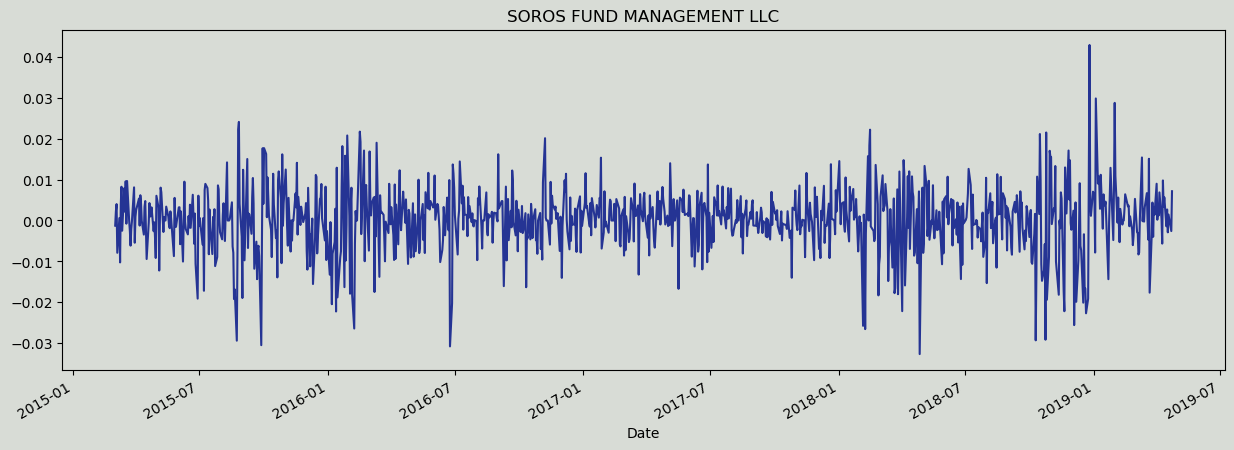

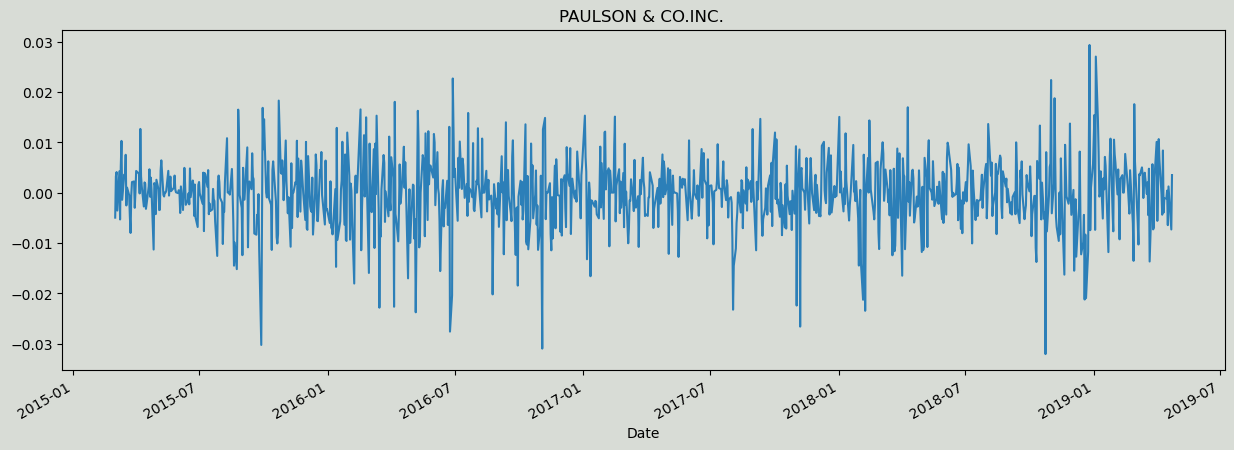

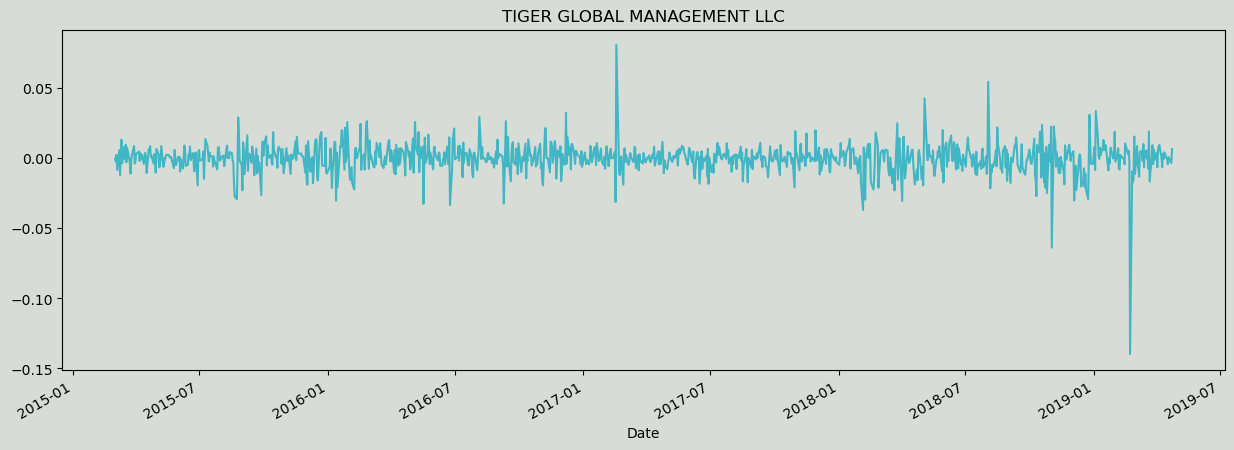

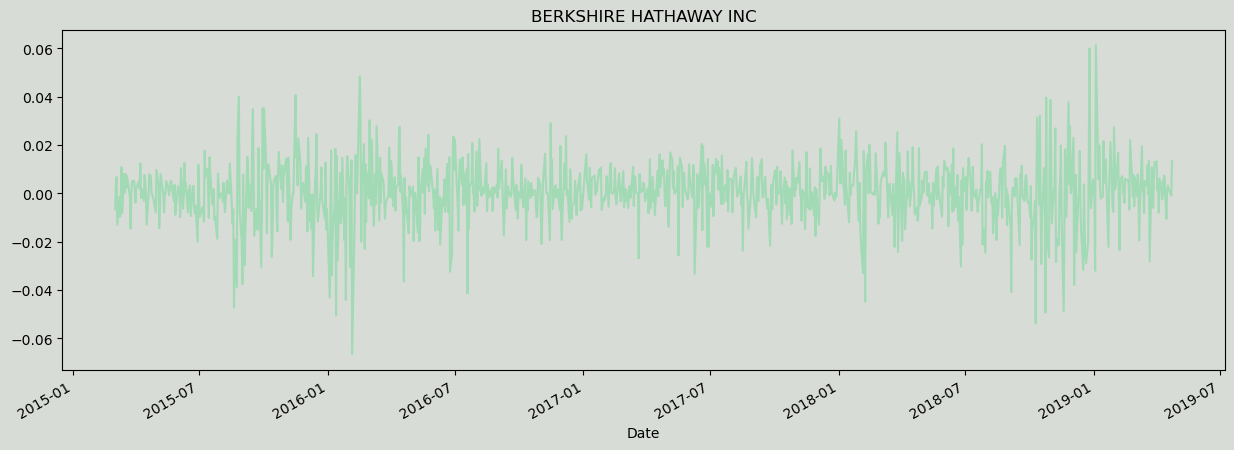

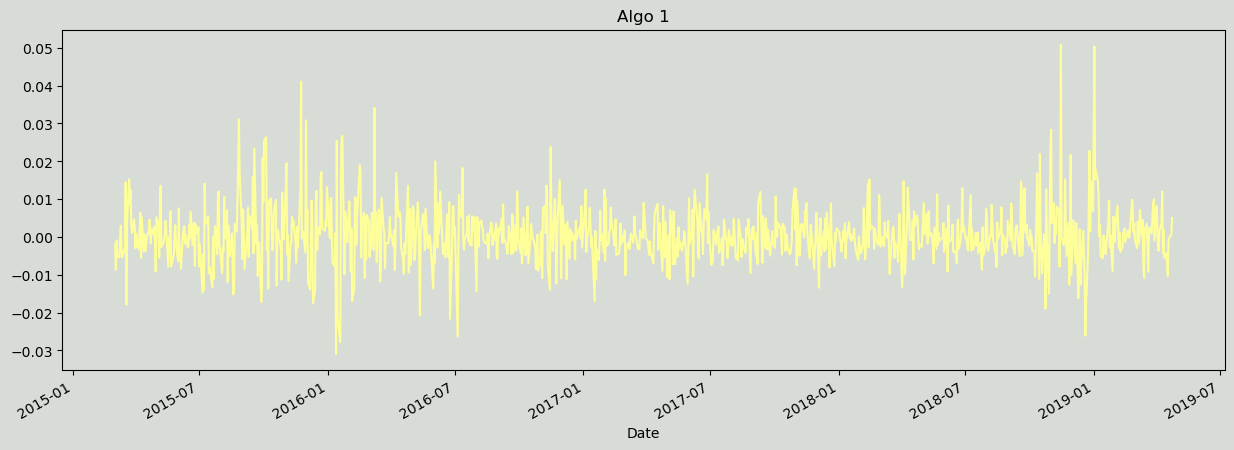

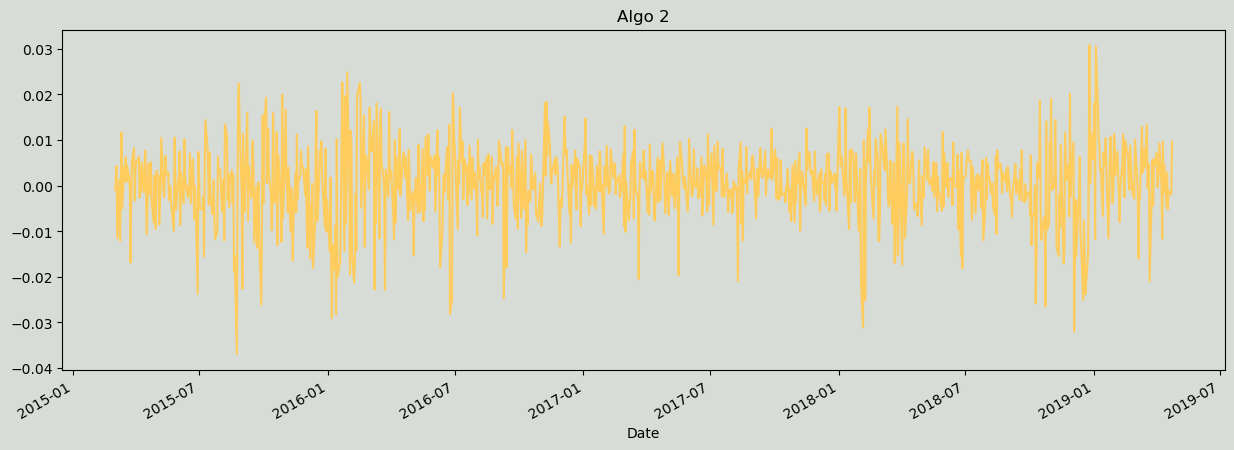

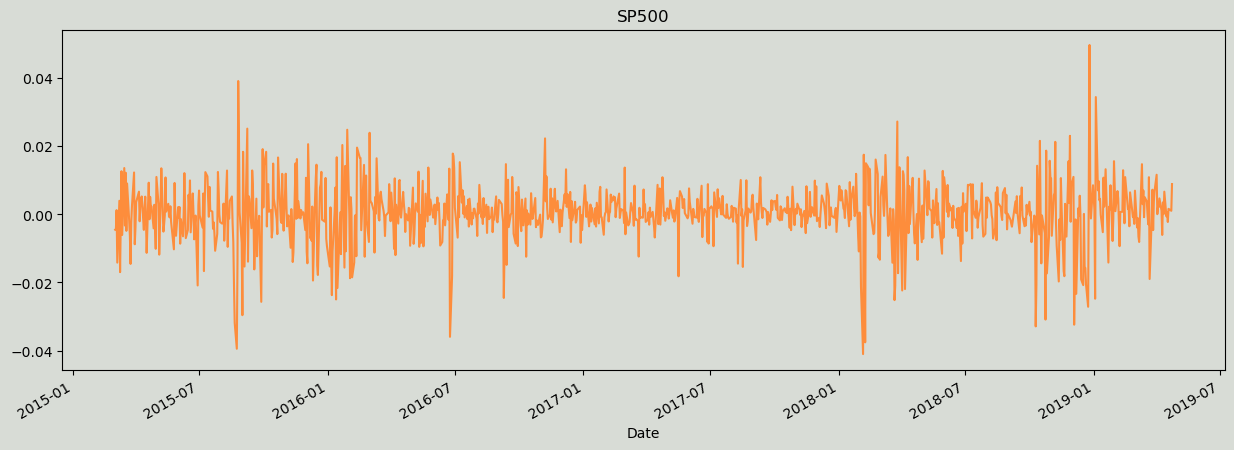

In [308]:
# Plot daily returns of all portfolios

# color palette can be changed here
# colors = ['springgreen', 'red', 'gold', 'mediumvioletred', 'lime', 'blue', 'dodgerblue']
# colors = ['#007F7F', '#009393', '#00B7B7', '#00CCCC', '#33CCCC', '#66CCCC', '#99CCCC']
colors = ['#253494', '#2c7fb8', '#41b6c4', '#a1dab4', '#ffff99', '#fecc5c', '#fd8d3c', 'red']


for i, col in enumerate(combined_df.columns):
    plt.figure().patch.set_facecolor('xkcd:light grey')
    plt.title(col)
    combined_df[col].plot(figsize = (15,5),
                          color = colors[i]).set_facecolor('xkcd:light grey')

#### Calculate and Plot cumulative returns.

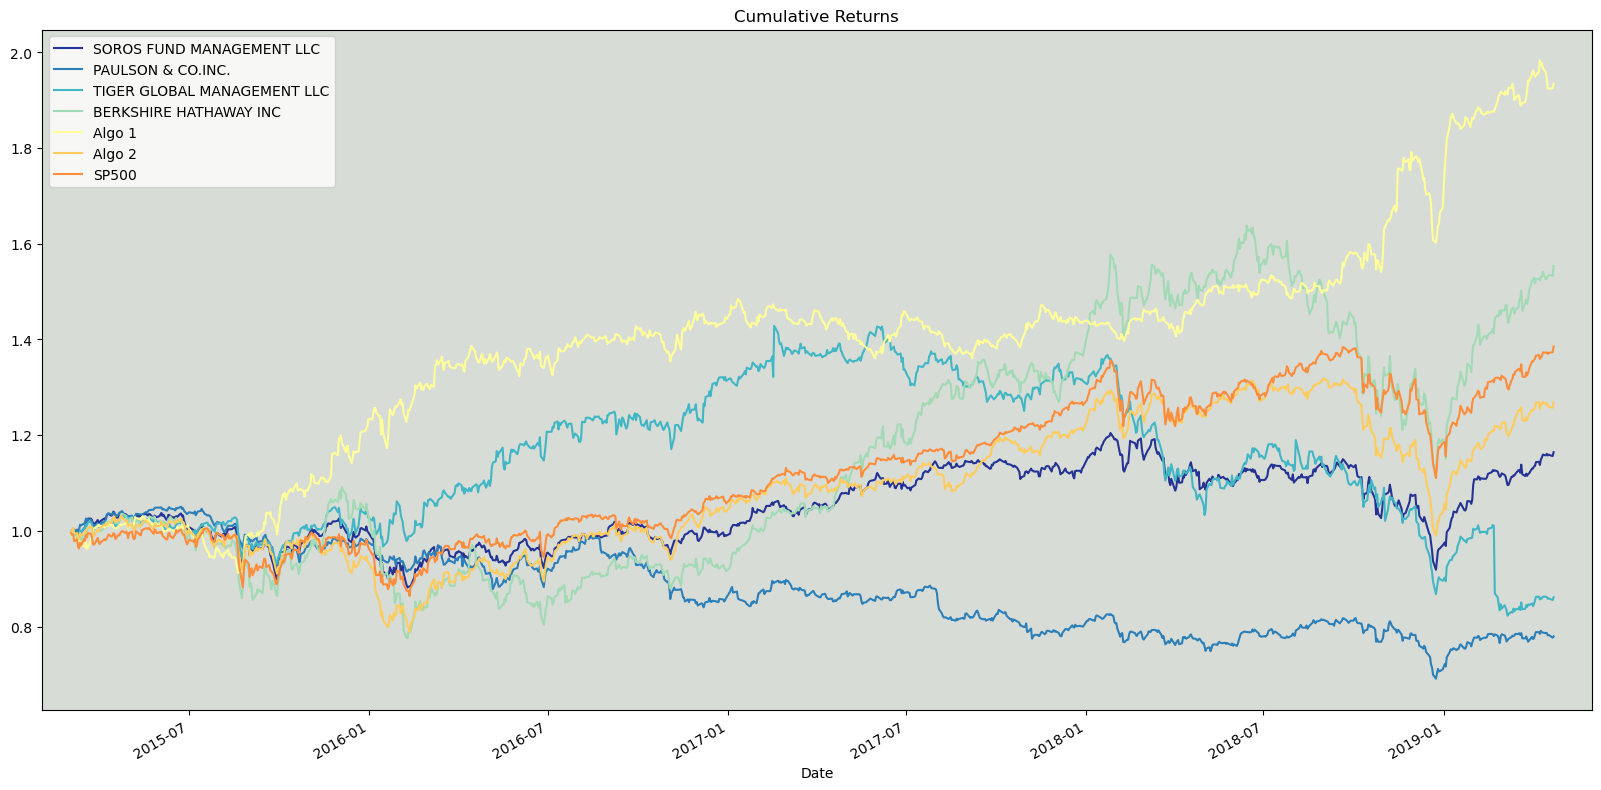

In [309]:
# Calculate cumulative returns of all portfolios
cumulative_ret_df = (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_ret_df.plot(figsize = (20,10),
                       color = colors,
                       xlim = ('2015-02-01','2019-06-01'),
                       title = "Cumulative Returns").set_facecolor('xkcd:light grey')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


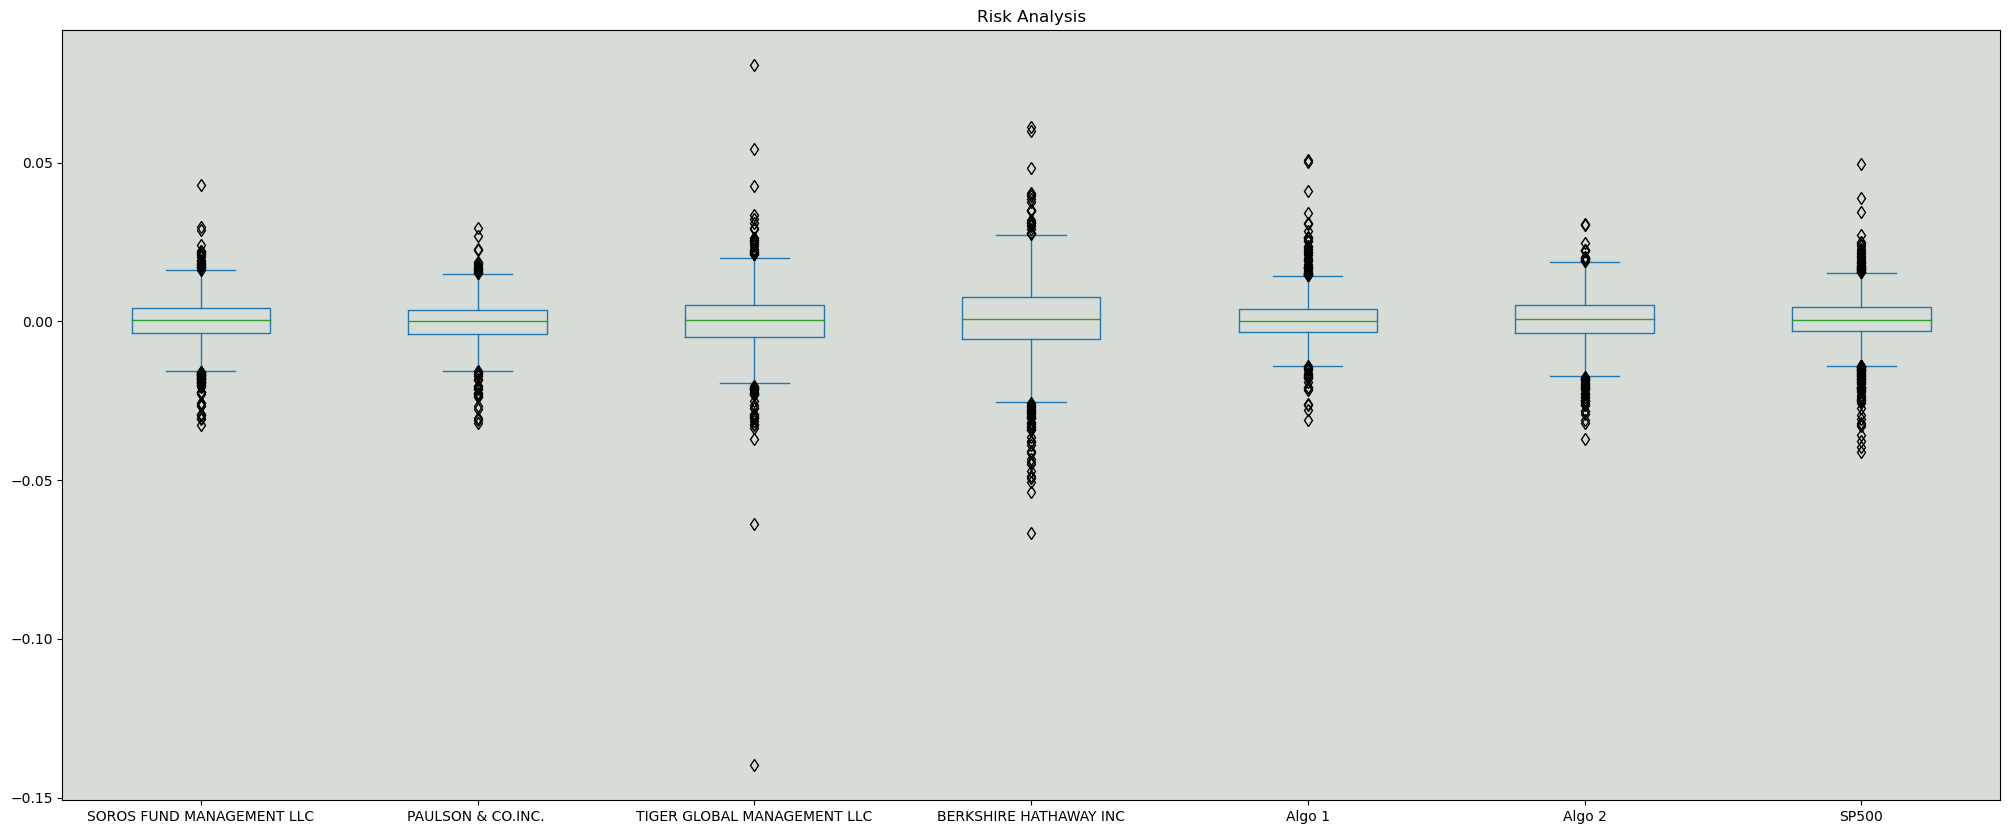

In [310]:
# Box plot to visually show risk
combined_df.plot(figsize = (25,10),
                 title = "Risk Analysis",
                 kind = 'box',
                 sym = 'd').set_facecolor('xkcd:light grey')

### Calculate Standard Deviations

In [311]:
# Calculate the daily standard deviations of all portfolios
std_df = combined_df.std()
print('>>>>> Daily Standard Deviation <<<<<')
std_df

>>>>> Daily Standard Deviation <<<<<


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [312]:
# Calculate  the daily standard deviation of S&P 500
spx_std = std_df['SP500']
# Determine which portfolios are riskier than the S&P 500
print('>>>>> Risk Assessment <<<<<\n')
for col in std_df.index:
    if col != 'SP500':
        if std_df[col] > spx_std:
            print(f"{col} is riskier than S&P 500")
        else:
            print(f"{col} is less risky than S&P 500")

>>>>> Risk Assessment <<<<<

SOROS FUND MANAGEMENT LLC is less risky than S&P 500
PAULSON & CO.INC.  is less risky than S&P 500
TIGER GLOBAL MANAGEMENT LLC is riskier than S&P 500
BERKSHIRE HATHAWAY INC is riskier than S&P 500
Algo 1 is less risky than S&P 500
Algo 2 is less risky than S&P 500


### Calculate the Annualized Standard Deviation

In [313]:
# Calculate the annualized standard deviation (252 trading days)
std_ann_df = std_df * np.sqrt(252)
print('>>>>> Annual Standard Deviation <<<<<')
std_ann_df

>>>>> Annual Standard Deviation <<<<<


SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

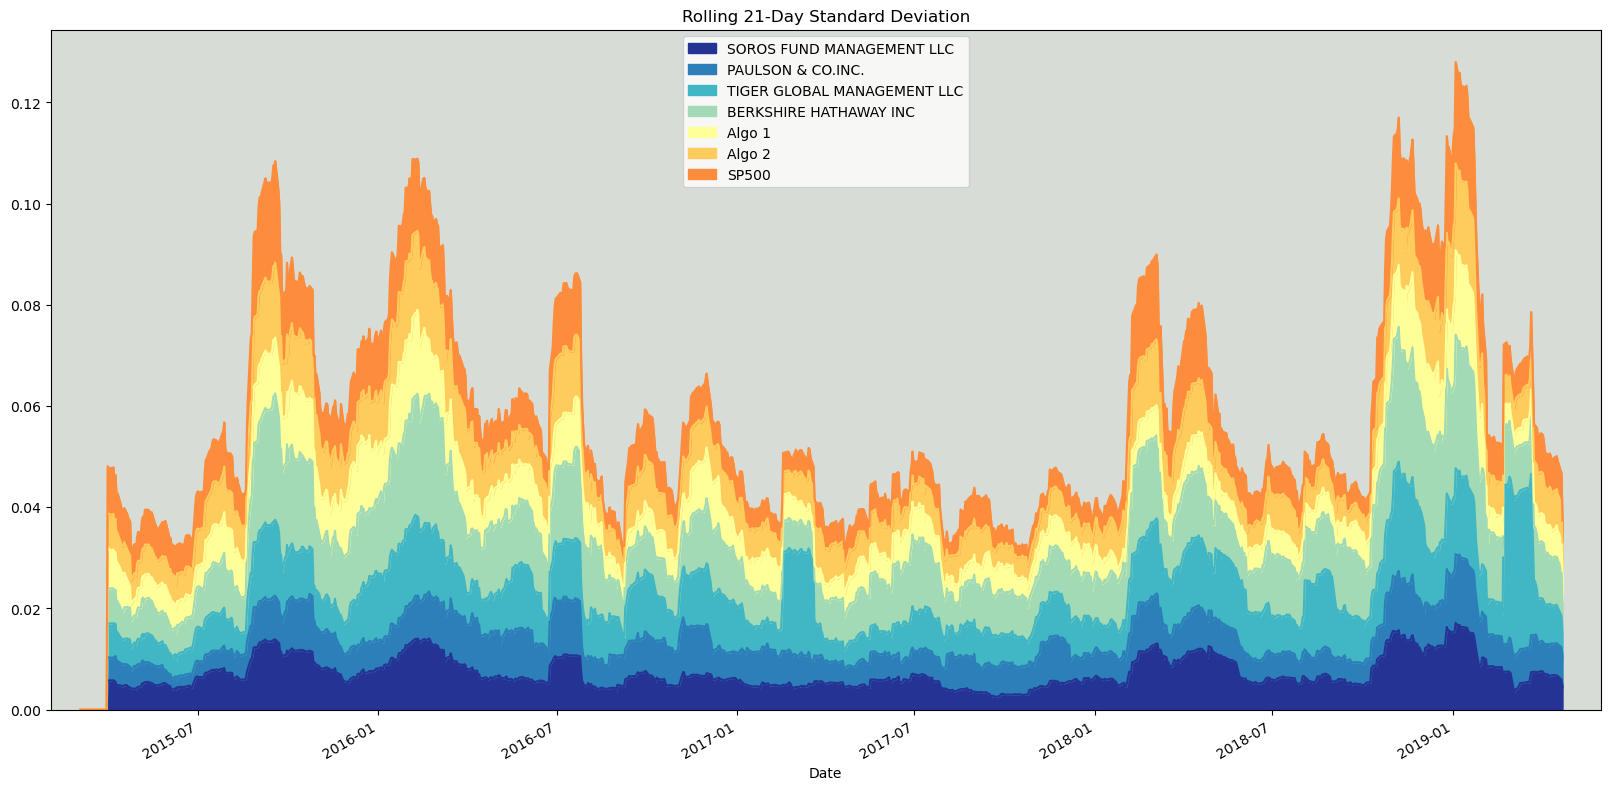

In [314]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_rolling_21_df = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation

std_rolling_21_df.plot(figsize = (20,10),
                       color = colors,
                       xlim = ('2015-02-01','2019-06-01'),
                       title = "Rolling 21-Day Standard Deviation",
                       kind = 'area').set_facecolor('xkcd:light grey')

### Calculate and plot the correlation

<AxesSubplot:>

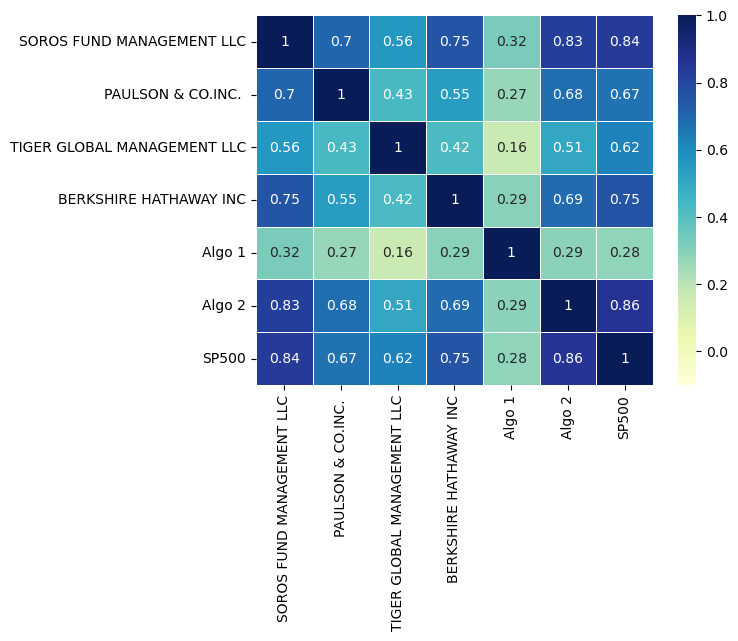

In [315]:
# Calculate the correlation
corr_df = combined_df.corr()
# Display de correlation matrix

# option 1:
# display(corr_df)

# option 2:
sns.heatmap(corr_df,
            vmin = -0.1,
            vmax = 1,
            linecolor= 'white',
            linewidths= 0.5,
            annot = True,
            cmap = 'YlGnBu')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

>>>>> Algo 1 Mean Beta <<<<<
           0.249


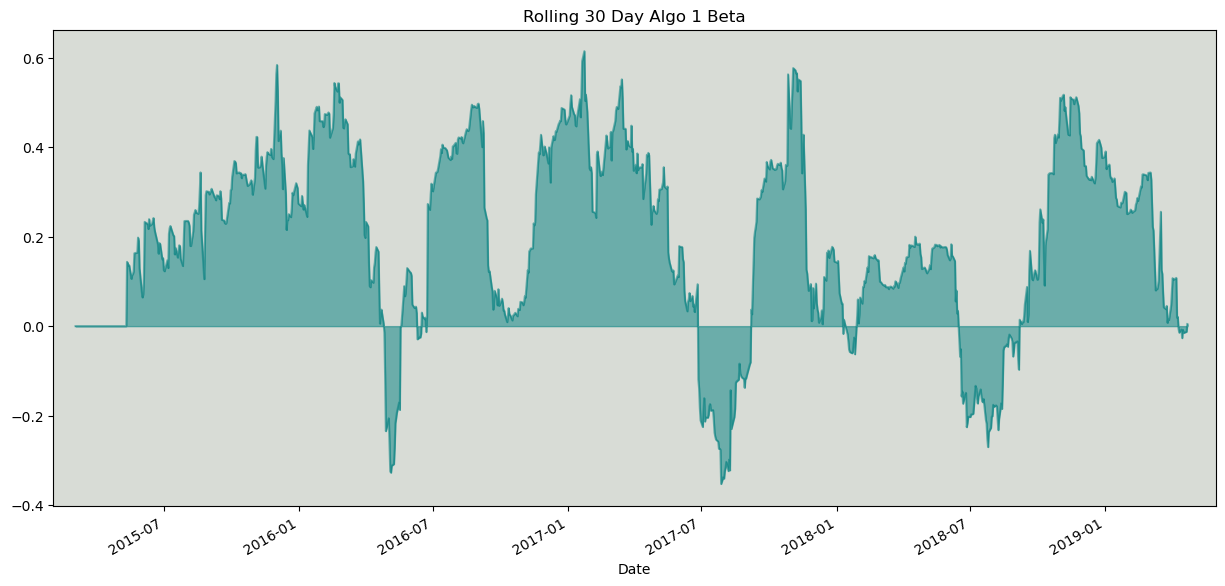

In [316]:
# method for calculating rolling beta

def rolling_beta(df, col1, col2, window):
    # Calculate covariance of a single portfolio

    covar = df[col1].rolling(window=window).cov(combined_df[col2])
    # Calculate variance of S&P 500

    var = df[col2].rolling(window=window).var()
    # Computing beta

    beta_rolling = covar / var
    
    return beta_rolling


# calculating mean beta
algo1_spx_covar = combined_df['Algo 1'].cov(combined_df['SP500'])
spx_var = combined_df['SP500'].var()
algo1_beta = algo1_spx_covar / spx_var

print('>>>>> Algo 1 Mean Beta <<<<<')
print("           "+ str(round(algo1_beta, 4)))

# Plot rolling beta trend
algo1_beta_rolling = rolling_beta(combined_df, 'Algo 1', 'SP500', 50)
algo1_beta_rolling.plot(figsize = (15,7),
                        title = "Rolling 30 Day Algo 1 Beta",
                        kind = 'area',
                        xlim = ('2015-02-01','2019-06-01'),
                        stacked = False,
                        color = '#007F7F').set_facecolor('xkcd:light grey')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

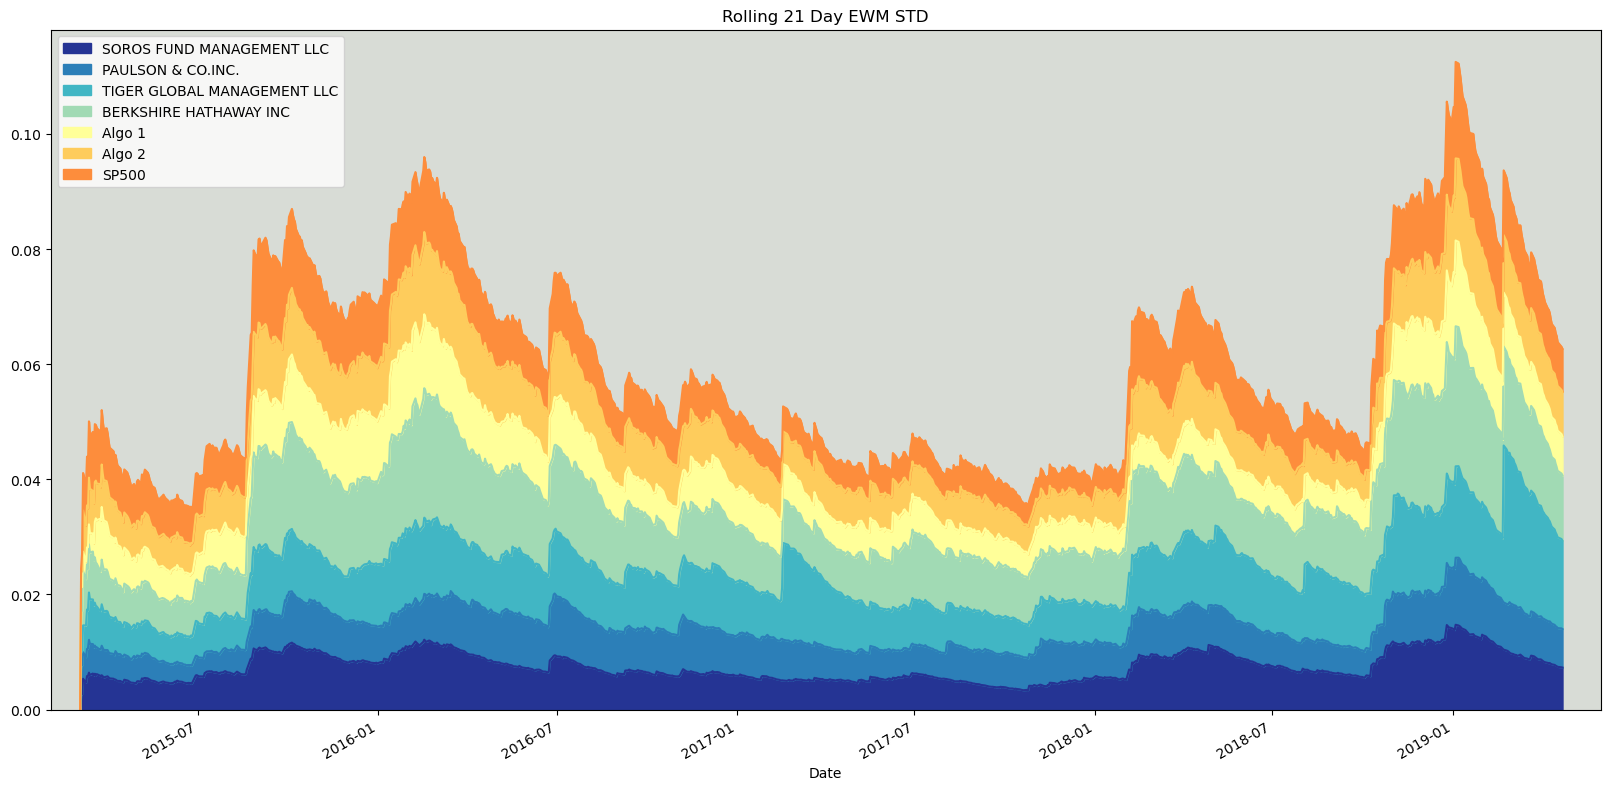

In [317]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize = (20,10),
                                        color = colors,
                                        xlim = ('2015-02-01','2019-06-01'),
                                        title = "Rolling 21 Day EWM STD",
                                        kind = 'area').set_facecolor('xkcd:light grey')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [318]:
# Annualized Sharpe Ratios
sharpe = (combined_df.mean()*252) / std_ann_df
print('>>>>> Sharpe Ratios <<<<<')
sharpe

>>>>> Sharpe Ratios <<<<<


SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

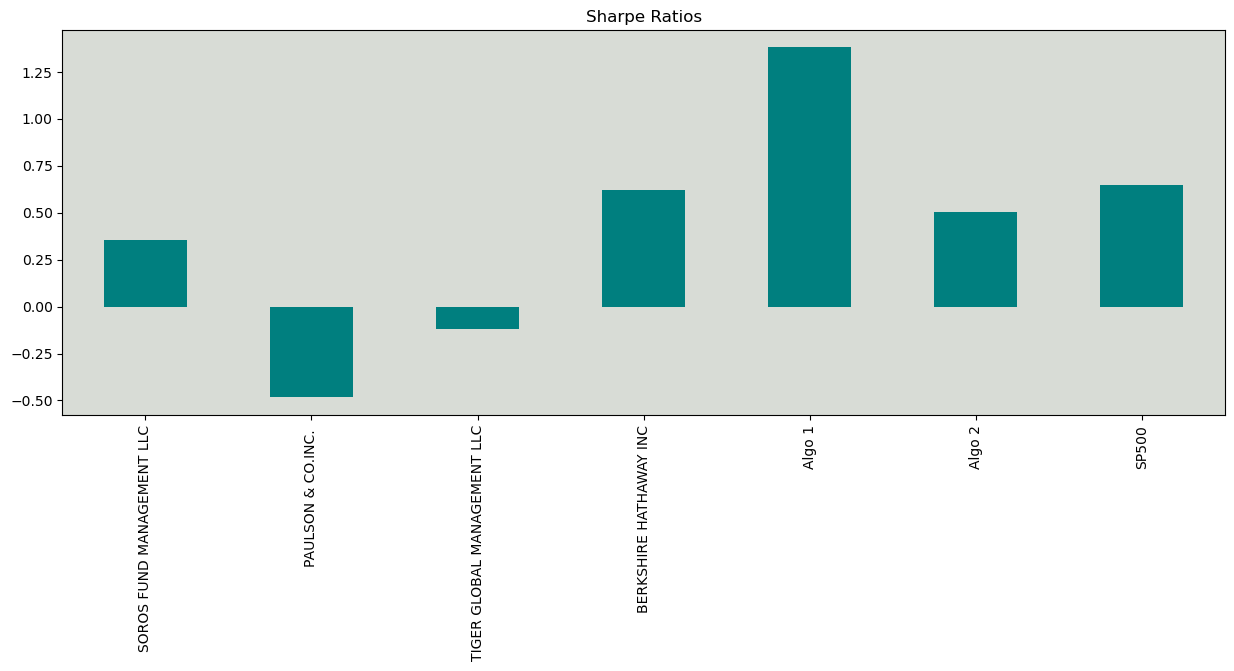

In [319]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot(figsize = (15,5),
            color = '#007F7F',
            title = "Sharpe Ratios",
            kind = 'bar').set_facecolor('xkcd:light grey')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The `Algo 1` strategy outperforms both the market `SP500` and the whale portfolios. `Algo 2` did not outperform the market, but did outperorm most of the whale portfolios. However `Berkshire` portfolio had a higher Sharpe ratio by about 0.12 points.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [320]:
# Reading data from 1st stock
aapl_path = Path('./Resources/aapl_historical.csv')
aapl_df = df_from_path(aapl_path, 'Trade DATE')

In [321]:
# Reading data from 2nd stock
cost_path = Path('./Resources/cost_historical.csv')
cost_df = df_from_path(cost_path, 'Trade DATE')

In [322]:
# Reading data from 3rd stock
goog_path = Path('./Resources/goog_historical.csv')
goog_df = df_from_path(goog_path, 'Trade DATE')

In [323]:
# Combine all stocks in a single DataFrame
my_combined_df = pd.concat([aapl_df, cost_df, goog_df], axis=0, join = 'inner')
my_combined_df

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


In [324]:
# Reset Date index
my_combined_df.reset_index(inplace=True)
my_combined_df

,Trade DATE,Symbol,NOCP
0,2018-05-11,AAPL,188.59
1,2018-05-14,AAPL,188.15
2,2018-05-15,AAPL,186.44
3,2018-05-16,AAPL,188.18
4,2018-05-17,AAPL,186.99
...,...,...,...
745,2019-05-03,GOOG,1185.40
746,2019-05-06,GOOG,1189.39
747,2019-05-07,GOOG,1174.10
748,2019-05-08,GOOG,1166.27


In [325]:
# Reorganize portfolio data by having a column per symbol
my_combined_df = my_combined_df.pivot_table(values = 'NOCP', index = 'Trade DATE', columns = 'Symbol' )
my_combined_df

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [326]:
# Calculate daily returns
my_daily_returns = my_combined_df.pct_change()
# Drop NAs
my_daily_returns.dropna(inplace=True)
# Display sample data
my_daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [327]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_return = my_daily_returns.dot(weights)
# Display sample data
my_portfolio_return

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [328]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([combined_df, my_portfolio_return], axis = 1, join = 'inner')
all_returns.columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP500', 'My Portfolio']
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


In [329]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

all_returns.dropna(inplace=True)

# (1+all_returns).cumprod().plot(figsize = (20,10))
# inner join only concats rows where all data exists

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [330]:
# Calculate the annualized `std`
all_std = all_returns.std() * np.sqrt(252)
print('>>>>> All Annual Standard Deviations <<<<<')
all_std

>>>>> All Annual Standard Deviations <<<<<


SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP500                          0.152054
My Portfolio                   0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

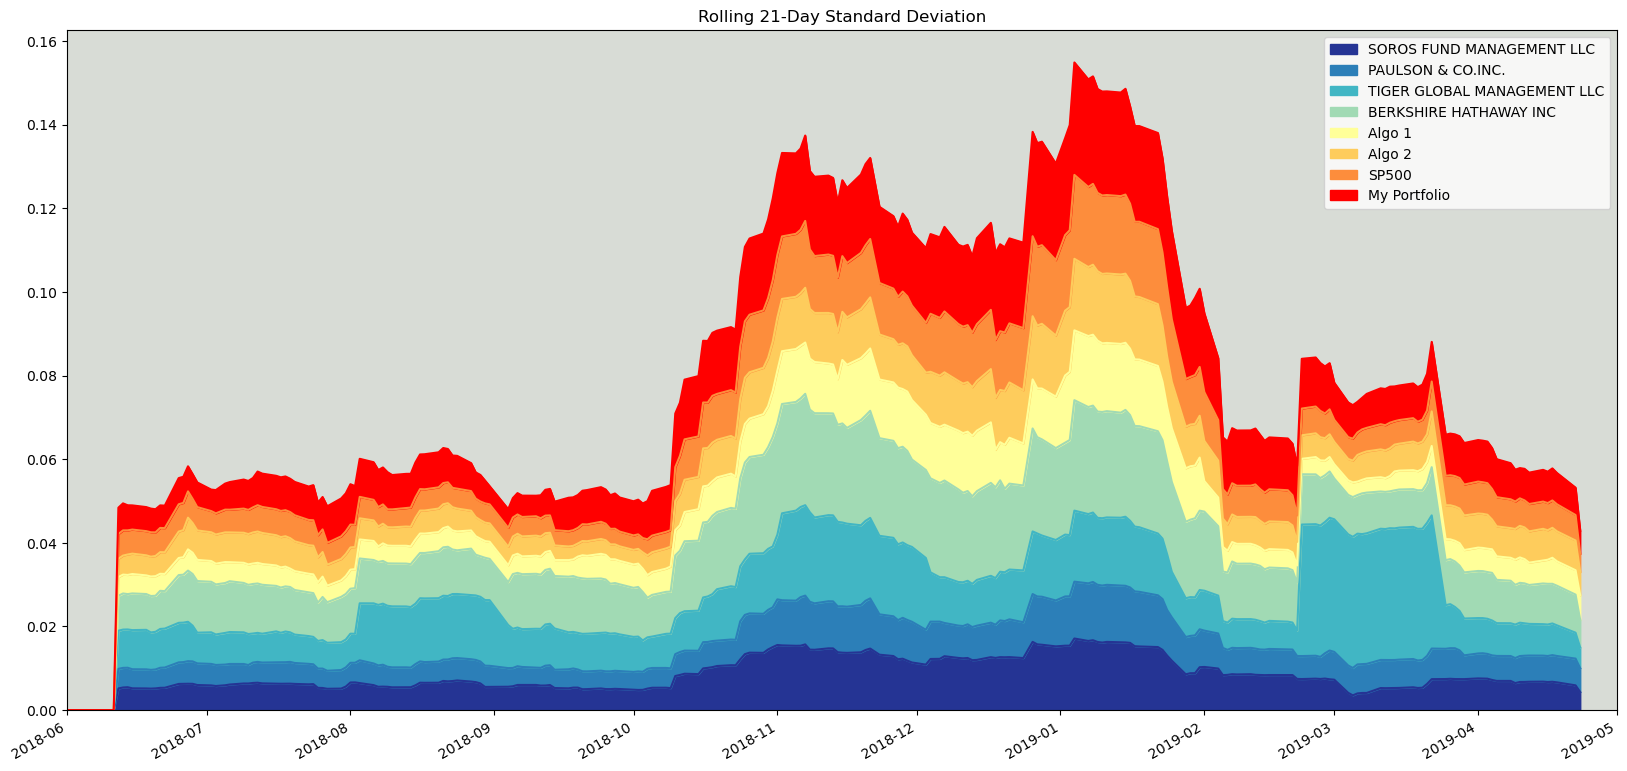

In [331]:
# Calculate rolling standard deviation
all_std_rolling_21 = all_returns.rolling(window=21).std()
# Plot rolling standard deviation
all_std_rolling_21.plot(figsize = (20,10),
                       color = colors,
                        xlim = ('2018-06-01','2019-05-01'),
                       title = "Rolling 21-Day Standard Deviation",
                       kind = 'area').set_facecolor('xkcd:light grey')

### Calculate and plot the correlation

<AxesSubplot:>

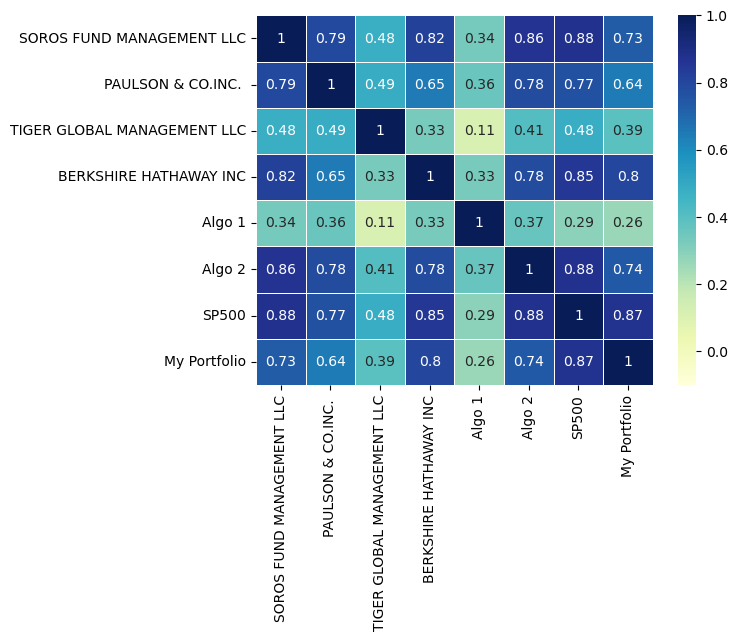

In [332]:
# Calculate and plot the correlation
all_corr = all_returns.corr()
sns.heatmap(all_corr,
            vmin = -0.1,
            vmax = 1,
            linecolor= 'white',
            linewidths= 0.5,
            annot = True,
            cmap = 'YlGnBu')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

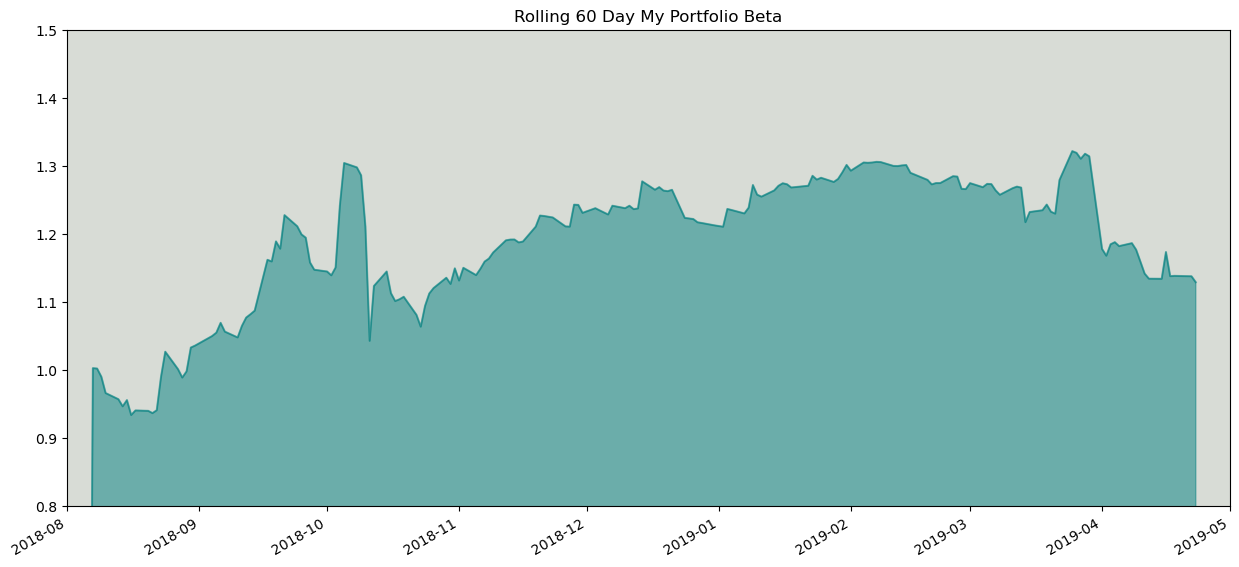

In [339]:
# Calculate and plot Beta
my_beta_60  = rolling_beta(all_returns, 'My Portfolio', 'SP500', 60)
my_beta_60.plot(figsize = (15,7),
                        title = "Rolling 60 Day My Portfolio Beta",
                        kind = 'area',
                        xlim = ('2018-08-01','2019-05-01'),
                        ylim = (0.8, 1.5),
                        stacked = False,
                        color = '#007F7F').set_facecolor('xkcd:light grey')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [334]:
# Calculate Annualized Sharpe Ratios
all_sharpe = (all_returns.mean() * 252)  / (all_returns.std() * np.sqrt(252))
print('>>>>> Sharpe Ratios <<<<<')
all_sharpe

>>>>> Sharpe Ratios <<<<<
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500                          0.584820
My Portfolio                   0.933123
dtype: float64


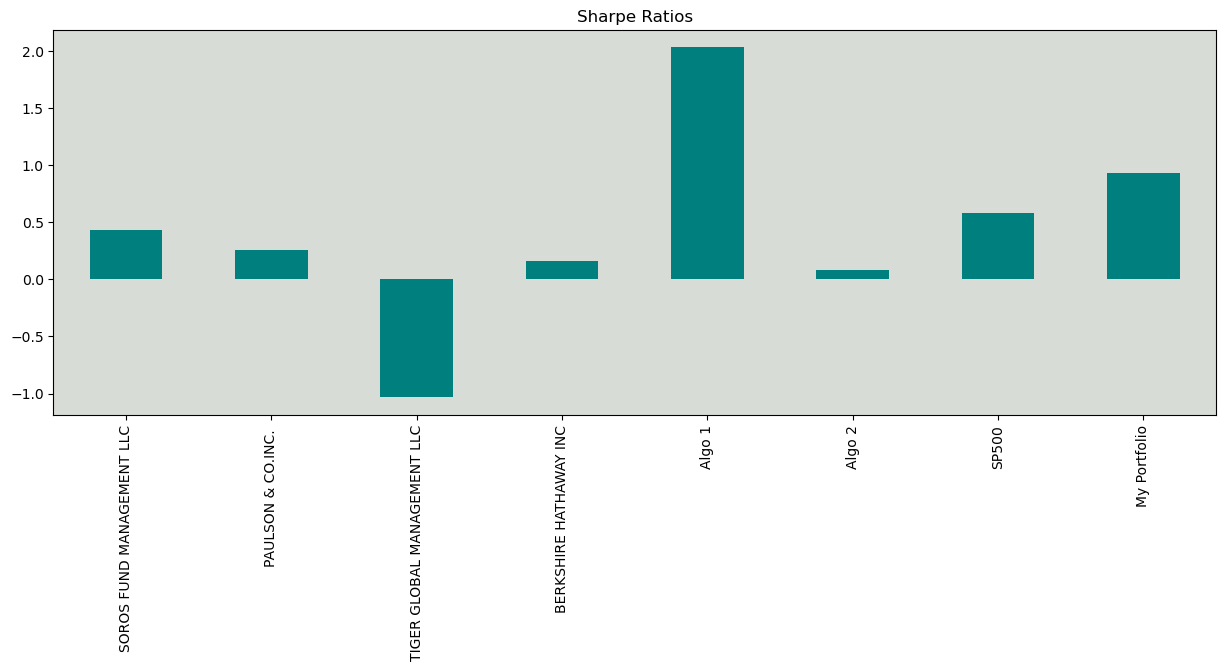

In [341]:
# Visualize the sharpe ratios as a bar plot
all_sharpe.plot(figsize = (15,5),
            color = '#007F7F',
            title = "Sharpe Ratios",
            kind = 'bar').set_facecolor('xkcd:light grey')

### How does your portfolio do?

My portfolio of stocks performed really well, at sharpe ratio of 0.93, it was beaten only by `Algo 1`. Beta was high, with an average well above 1 (i.e. more than twice as volatile as the market). It is a very volatile portfolio, that managed to provide a really good return.